

##  DV Pressure Prediction

### Problem Statement

* TP2 (bar) represents the pressure at the compressor within a pipeline system.
* It is a critical metric for assessing the operational conditions of the compressor unit.
* TP2 measurements are typically recorded in bars, indicating the pressure level.

### Importance of Predicting TP2

* **Compressor Health**: Predicting TP2 pressure is vital for monitoring the health of the compressor. Abnormal pressure spikes or drops can signal potential issues with the compressor, allowing for timely maintenance.
* **Energy Efficiency**: TP2 predictions aid in optimizing resource allocation. Operators can adjust compressor operations efficiently, minimizing energy consumption and operational costs.
* **Pipeline Integrity**: Maintaining the correct TP2 pressure is essential for the overall integrity of the pipeline system, ensuring safe and reliable transportation of materials.
* **Safety Assurance**: Accurate TP2 predictions enhance safety by helping operators proactively manage pressure variations, reducing the risk of equipment failure and ensuring operational safety.

##**1. Setting up the dataset repository**

In [2]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
!mkdir data

In [4]:
!unzip data/archive.zip -d data/

Archive:  data/archive.zip
  inflating: data/MetroPT3(AirCompressor).csv  


##**2. EDA**

In [5]:
df = pd.read_csv('data/MetroPT3(AirCompressor).csv')
df.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [6]:
#remove first column from df
df = df.iloc[:,1:]
df.columns

Index(['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses'],
      dtype='object')

In [7]:
df.shape

(1516948, 16)

In [8]:
df.describe()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
std,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01
min,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Plot the boxplot

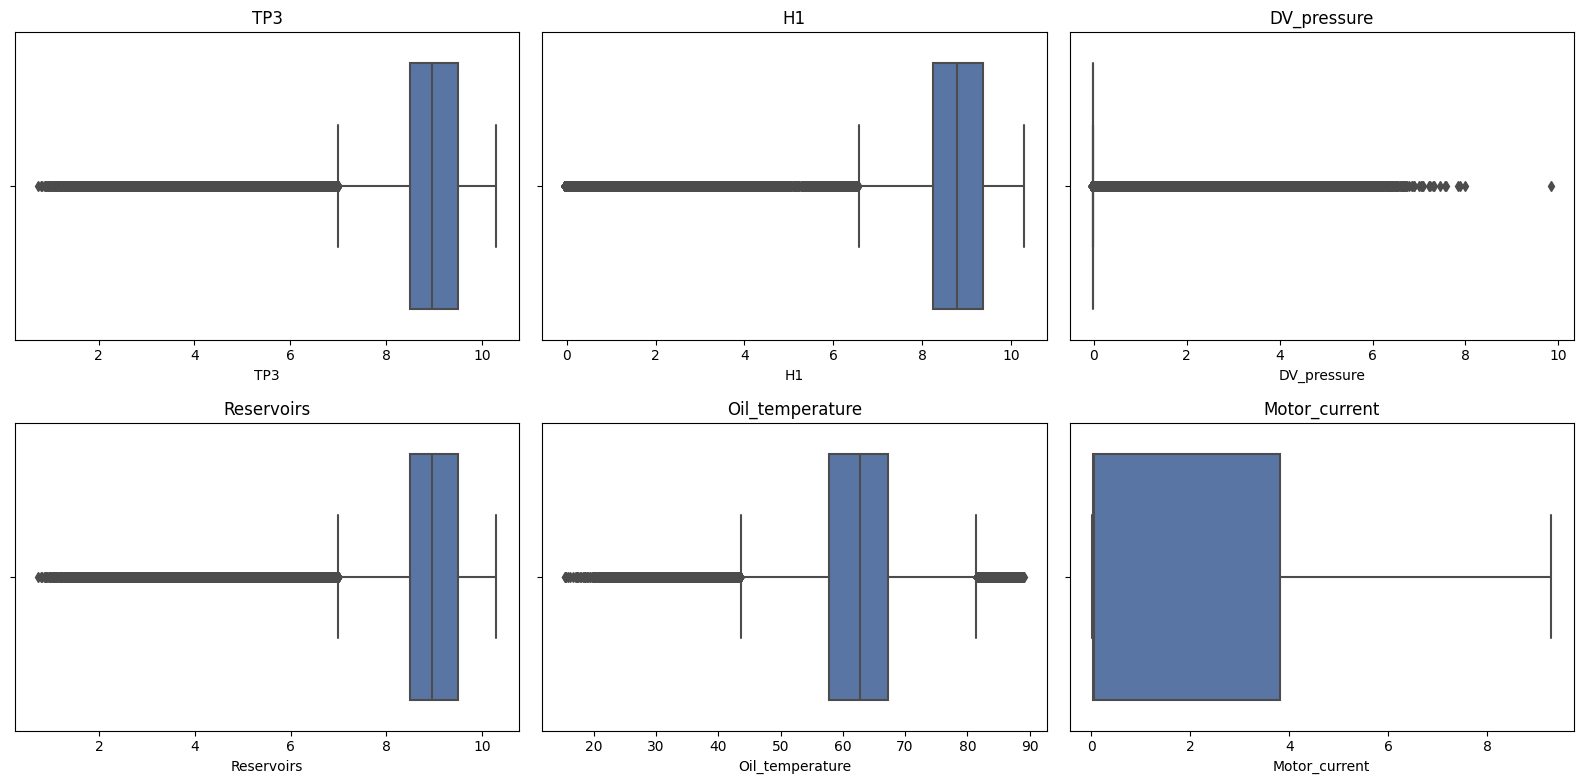

In [ ]:
# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(16, 8))

# Flatten the 2D axes array into a 1D array
axes = axes.flatten()

# Set the seaborn theme
sns.set_theme(style="whitegrid")

# List of columns to plot
columns_to_plot = ["TP3", "H1", "DV_pressure", "Reservoirs", "Oil_temperature", "Motor_current"]

# Loop through the columns and plot each one
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title for each subplot

# Remove any empty subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

**Is there a correlation between TP2 and TP3?**

<Axes: xlabel='TP3', ylabel='TP2'>

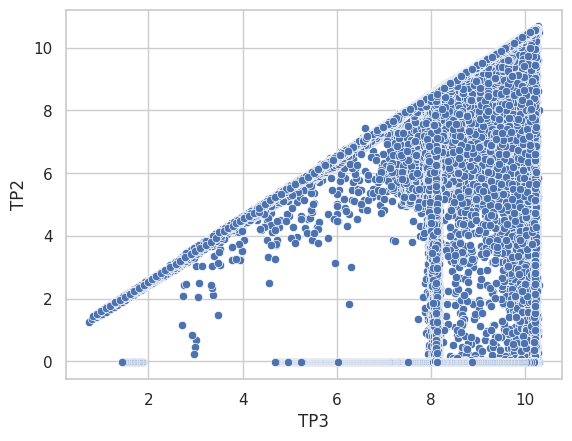

In [ ]:
sns.scatterplot(x=df["TP3"], y=df["TP2"])

**Is there a correlation between TP2 and H1?**

<Axes: xlabel='H1', ylabel='TP2'>

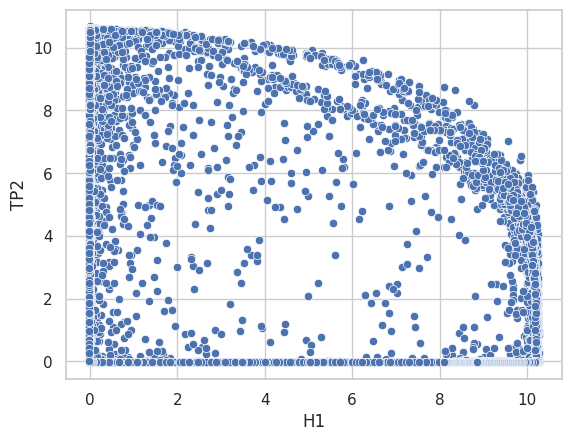

In [ ]:
sns.scatterplot(x=df["H1"], y=df["TP2"])

**Is there a correlation between TP2 and DV_pressure?**

<Axes: xlabel='DV_pressure', ylabel='TP2'>

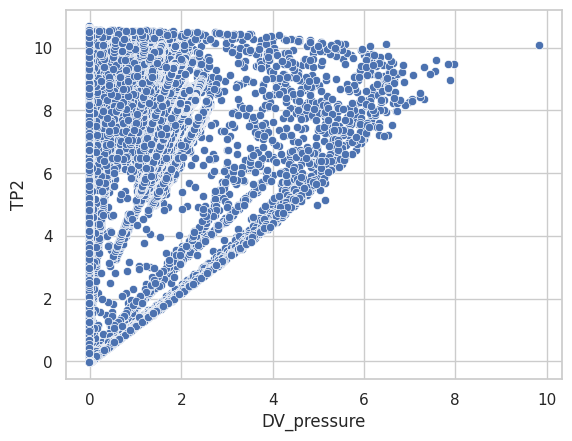

In [ ]:
sns.scatterplot(x=df["DV_pressure"], y=df["TP2"])

**Is there a correlation between TP2 and Reservoirs?**

<Axes: xlabel='Reservoirs', ylabel='TP2'>

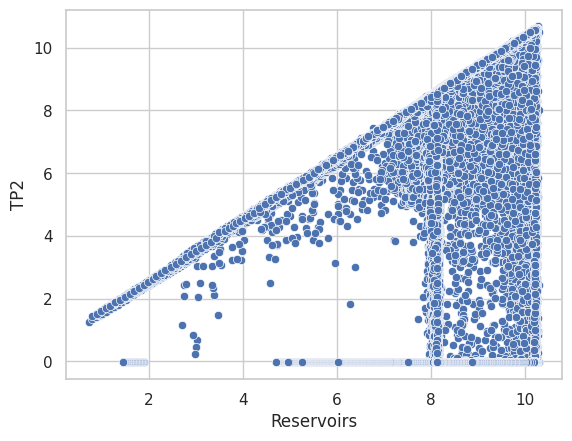

In [ ]:
sns.scatterplot(x=df["Reservoirs"], y=df["TP2"])

**Is there a correlation between TP2 and Oil temperature?**

<Axes: xlabel='Oil_temperature', ylabel='TP2'>

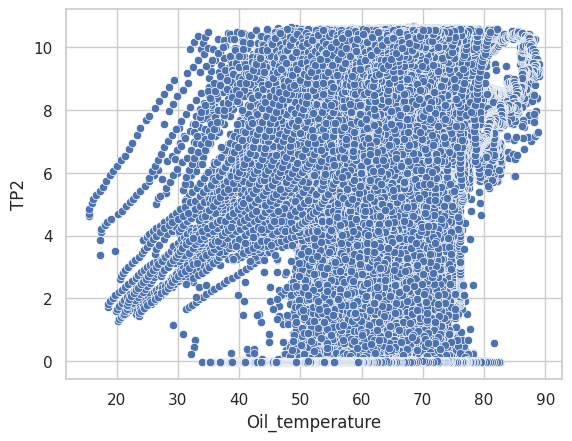

In [ ]:
sns.scatterplot(x=df["Oil_temperature"], y=df["TP2"])

**Is there a correlation between TP2 and Motor current?**

<Axes: xlabel='Motor_current', ylabel='TP2'>

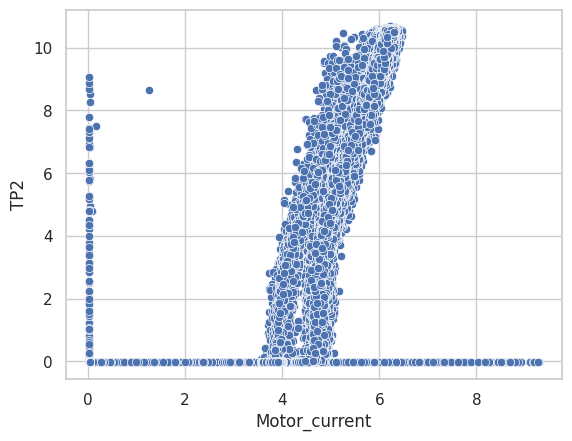

In [ ]:
sns.scatterplot(x=df["Motor_current"], y=df["TP2"])

### Observations

* The scatter plot above highlights significant linear correlations between TP2 and reservoirs, TP3, and DV_pressure.
* Notably, the relationship between H1 and TP2 appears peculiar. TP2 consistently remains at zero, resulting in a horizontal line. However, within the data points, some anomalous behavior is observed, as TP2 intermittently assumes non-zero values. Consequently, assessing the relationship between TP2 and H1 solely based on the scatter plot is challenging.
* Therefore, further analysis of these features may require correlation techniques to gain deeper insights.

### Null Values in the dataset?

In [ ]:
df.isnull().sum()

timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

##**3. Data Transformations**

In [9]:
from sklearn import preprocessing

### Let us now split the dataset into train-val-test sets.

In [10]:
del df["timestamp"]
df.head(3)

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [11]:
data_df = df.copy()
del data_df["TP2"]
data_df.head()

,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


### Heat map

<Axes: >

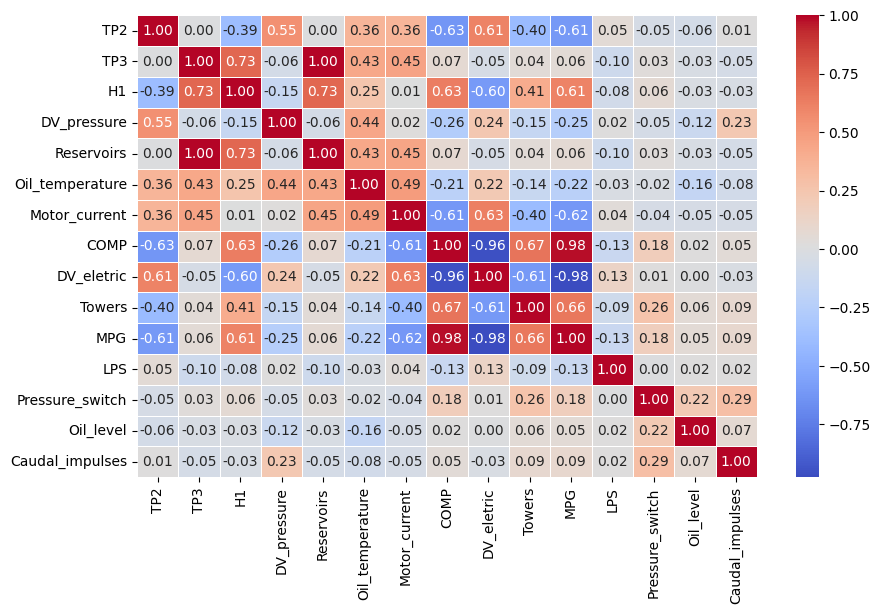

In [ ]:
new_df = df[["TP2", "TP3", "H1", "DV_pressure", "Reservoirs", "Oil_temperature", "Motor_current", "COMP", "DV_eletric", "Towers","MPG","LPS","Pressure_switch","Oil_level","Caudal_impulses"]]
# sns.heatmap(data=new_df.corr(), lw = 1, fmt='.2f', linewidth=0.4,annot_kws={"size": 10}, cmap='coolwarm',ax=ax)
corr_matrix = new_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4, annot_kws={"size": 10}, cmap='coolwarm',ax=ax)

### Observations

* The heatmap illustrates a robust correlation between TP2 and several variables, notably including DV_pressure, COMP, DV_electric, and MPG.

* To identify the most optimal input features while balancing the trade-off between computation time and model accuracy, the utilization of Lasso regression can be considered.

## **4. Data Normalization/Standardization**

In [12]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data_df, df["TP2"], random_state=42, test_size=0.20)

In [14]:
X_train

,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
65256,8.878,8.862,-0.016,8.880,58.250,0.0350,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1409954,9.176,9.162,-0.020,9.176,65.575,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
674985,9.670,9.656,-0.022,9.668,62.475,3.8200,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
160529,8.864,8.848,-0.022,8.864,52.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
730739,7.442,-0.008,1.732,7.444,69.125,4.8600,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,8.474,-0.016,-0.024,8.474,69.650,5.7375,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1414414,9.630,9.616,-0.020,9.632,67.450,3.8050,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
131932,8.958,8.942,-0.016,8.960,57.075,0.0375,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
671155,8.752,8.740,-0.022,8.752,52.900,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [15]:
y_train

65256     -0.008
1409954   -0.010
674985    -0.012
160529    -0.012
730739     5.792
           ...  
259178     8.904
1414414   -0.010
131932    -0.014
671155    -0.016
121958    -0.016
Name: TP2, Length: 1213558, dtype: float64

In [16]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((1213558, 14), (303390, 14))

In [18]:
X_train_scaled

array([[-0.16711887,  0.38810895, -0.1879487 , ...,  0.09326079,
         0.32548128,  0.25944326],
       [ 0.29916609,  0.47811909, -0.19842758, ...,  0.09326079,
         0.32548128,  0.25944326],
       [ 1.07213511,  0.6263358 , -0.20366702, ...,  0.09326079,
         0.32548128,  0.25944326],
       ...,
       [-0.0419417 ,  0.41211165, -0.1879487 , ...,  0.09326079,
         0.32548128,  0.25944326],
       [-0.36427292,  0.35150482, -0.20366702, ...,  0.09326079,
         0.32548128,  0.25944326],
       [ 1.43201948,  0.69534358, -0.20366702, ...,  0.09326079,
         0.32548128,  0.25944326]])

In [19]:
X_test_scaled

array([[ 0.25535408,  0.47031821, -0.20366702, ...,  0.09326079,
         0.32548128,  0.25944326],
       [ 1.35691317,  0.68154203, -0.1879487 , ...,  0.09326079,
         0.32548128,  0.25944326],
       [-0.91818189,  0.24529285, -0.20366702, ...,  0.09326079,
         0.32548128,  0.25944326],
       ...,
       [ 1.34439546,  0.68094196, -0.2141459 , ...,  0.09326079,
         0.32548128, -3.85440734],
       [-0.79613415,  0.26869548, -0.20890646, ...,  0.09326079,
         0.32548128,  0.25944326],
       [-0.89314646,  0.25069346, -0.2141459 , ...,  0.09326079,
         0.32548128,  0.25944326]])

## **5. Applying Lasso regression to get most optimal input features**

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LassoCV

In [ ]:
# Create a range of alpha values
alphas = np.logspace(-4, 4, 100)

# Initialize a LassoCV model with cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=5)

# Fit the model to your data
lasso_cv.fit(X_train, y_train)

# Get the optimal alpha
optimal_alpha = lasso_cv.alpha_

print("Optimal Alpha:", optimal_alpha)

Optimal Alpha: 0.0001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.873e+04, tolerance: 1.283e+03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Instantiate the Lasso model with an appropriate alpha (controls sparsity)
lasso = Lasso(alpha=0.0001)

# Fit the model to your data
lasso.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.873e+04, tolerance: 1.283e+03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.0001)

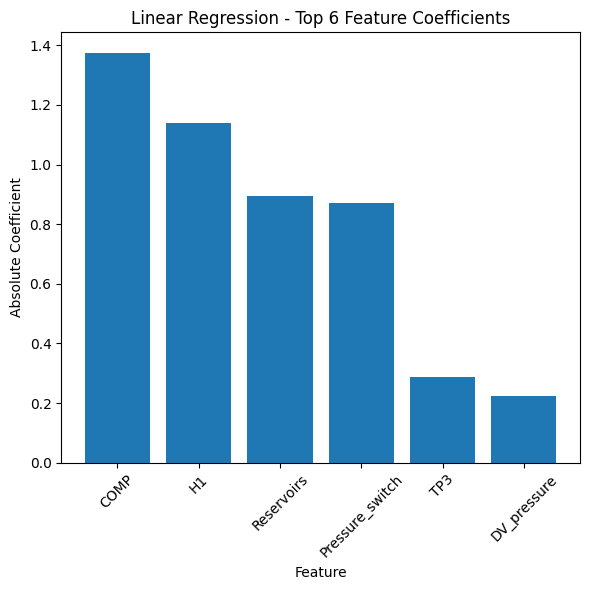

In [ ]:
# Get feature coefficients
coefficients = np.abs(lasso.coef_)

# Sort coefficients in descending order
indices = np.argsort(coefficients)[::-1]

# Visualize the top N important features
N = 6 # Adjust this value as needed
plt.figure(figsize=(6, 6))
plt.title("Linear Regression - Top {} Feature Coefficients".format(N))
plt.bar(range(N), coefficients[indices][:N], align="center")
plt.xticks(range(N), data_df.columns[indices][:N], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Absolute Coefficient")
plt.tight_layout()
plt.show()

* Evidently, the graph reveals that the top six optimal features are COMP, H1, Reservoirs, Pressure_switch, TP3, and DV_pressure.
* Nonetheless, a strategic decision is made to limit the feature selection to the top four. This choice is driven by the fact that the last two features exhibit coefficients below 0.4. Expanding the feature set to include them would necessitate additional model training, consuming considerable time, and yielding marginal improvements in accuracy.

In [21]:
X_train = X_train[["COMP", "H1", "Pressure_switch", "Reservoirs"]]
X_test = X_test[["COMP", "H1", "Pressure_switch", "Reservoirs"]]

In [22]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((1213558, 4), (303390, 4))

In [23]:
X_train_scaled

array([[ 0.44137046,  0.38810895,  0.09326079, -0.16516574],
       [ 0.44137046,  0.47811909,  0.09326079,  0.29855988],
       [ 0.44137046,  0.6263358 ,  0.09326079,  1.06934705],
       ...,
       [ 0.44137046,  0.41211165,  0.09326079, -0.03983449],
       [ 0.44137046,  0.35150482,  0.09326079, -0.36569574],
       [ 0.44137046,  0.69534358,  0.09326079,  1.42967439]])

In [24]:
X_test_scaled

array([[ 0.44137046,  0.47031821,  0.09326079,  0.25469394],
       [ 0.44137046,  0.68154203,  0.09326079,  1.35447564],
       [ 0.44137046,  0.24529285,  0.09326079, -0.92028651],
       ...,
       [ 0.44137046,  0.68094196,  0.09326079,  1.3450758 ],
       [ 0.44137046,  0.26869548,  0.09326079, -0.79182198],
       [ 0.44137046,  0.25069346,  0.09326079, -0.89522026]])

## 6. Training different models to compare accuracy

In [25]:
model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                     "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}},
    'DecisionTreeRegressor': {"model": DecisionTreeRegressor(), "params": {'max_depth': list(range(1,10))}}
}


In [26]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_reg_model_ours)
    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return model_results

LinearRegression 0.5706707539563628 {}
RandomForestRegressor 0.43127657612444553 {'max_depth': 9, 'n_estimators': 30}
DecisionTreeRegressor 0.4341808631793079 {'max_depth': 9}
Best model:  RandomForestRegressor(max_depth=9, n_estimators=30, random_state=42)


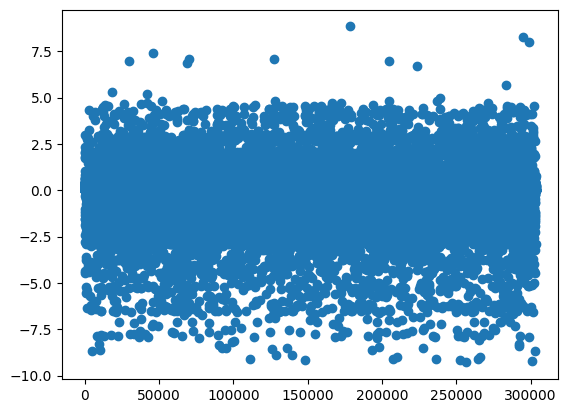

In [27]:
model_results = eval_models()

In [28]:
model_results

,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,0.570671,0.577679,0.156643,0.157441,{}
RandomForestRegressor,0.431277,0.441542,0.088906,0.09092,"{'max_depth': 9, 'n_estimators': 30}"
DecisionTreeRegressor,0.434181,0.446014,0.089148,0.091366,{'max_depth': 9}


* The provided table displays key performance metrics for three regression models. The Random Forest Regressor emerges as the top performer, exhibiting the lowest RMSE and MAE on the test dataset. However, it's essential to consider that the Decision Tree Regressor achieved competitive accuracy levels with only a fraction of the training time, requiring just 5 minutes compared to the Random Forest's 1.5 hours. Although the Random Forest does offer slightly improved accuracy, the relatively small difference in error suggests that the Decision Tree could be an attractive choice due to its significantly reduced training time, making it more practical for real-time or time-sensitive applications where model training time is a crucial factor.